## Задача 1. Шолохов Алексей, 474гр.

In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Будем аппроксимировать функцию Бесселя $J_0$ ее рядом Тейлора, который имеет вид:
$$J_0(x) = \sum_{k=0}^{\infty}\frac{(-1)^K}{(k!)^2}(\frac{x}{2})^{2k}$$

Необходимое число членов ряда Тейлора не подсчитывается заранее: используется ленивость по памяти некоторых структур Python

J(1) = 0.77


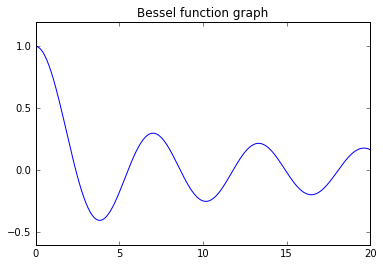

In [5]:
#Bessel function represented as Taylor series
def bessel(x):
    #Returns a k member of Taylor series evaluated in x.
    def bessel_step_series(k, x):
        import math 
        return (-1)**k/(math.factorial(k))**2*(x/2)**(2*k)

    import sys
    ans = 0
    
    series = (bessel_step_series(k, x) for k in range(sys.maxsize))

    for s in series:
        if s == 0:
            break
        ans += s
    return ans

print("J(1) = %.2f" % bessel(1))

X = np.linspace(0, 20, 300)
pylab.plot(X, [bessel(x) for x in X])
pylab.title("Bessel function graph")

Методом численного дифференцирования первого порядка получим $J'(0)$

J'(1) =-0.44


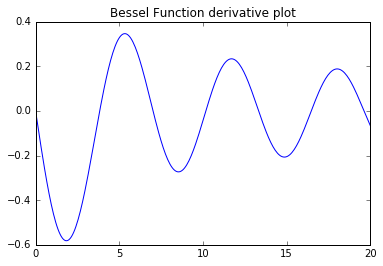

In [7]:
M = 1

def diff_1d_order(func, x, precision = 10e-6):
    h = 2*precision/M
    return (func(x+h) - func(x))/h

pylab.plot(X, [diff_1d_order(bessel, x) for x in X])
pylab.title("Bessel Function derivative plot")

print("J'(1) =%.2f" % diff_1d_order(bessel, 1))